<a href="https://colab.research.google.com/github/shihanxie/Econ475/blob/main/Modeling%26ForecastingSeasonality(and%20trend).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling and Forecasting Seasonality

In [1]:
import numpy as np
import pandas as pd
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0, 0, '1950'),
 Text(0, 0, '1960'),
 Text(0, 0, '1970'),
 Text(0, 0, '1980'),
 Text(0, 0, '1990')]

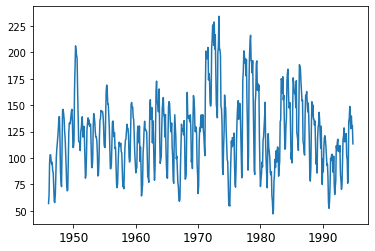

In [39]:
housing = pd.read_csv('https://raw.githubusercontent.com/shihanxie/Econ475/main/data/HousingStarts.csv')
f, ax = plt.subplots(1,1)
ax.plot(housing['Date'], housing['HSTARTS'])
ax.set_xticks(['1950-01-01','1960-01-01', '1970-01-01', '1980-01-01', '1990-01-01'])
ax.set_xticklabels(['1950', '1960', '1970', '1980', '1990'], fontsize='large')

## Generate Seasonal Dummies

In [45]:
# Generate dummy variables for every month
housing['month'] = pd.DatetimeIndex(housing['Date']).month
housing['time'] = np.arange(housing.shape[0])
dummy = pd.get_dummies(housing['month'], prefix='m')
df = pd.concat([housing,dummy], axis=1)
df

,Date,HSTARTS,month,time,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,1946-01-01,57.000000,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1946-02-01,65.000000,2,1,0,1,0,0,0,0,0,0,0,0,0,0
2,1946-03-01,95.000000,3,2,0,0,1,0,0,0,0,0,0,0,0,0
3,1946-04-01,103.000000,4,3,0,0,0,1,0,0,0,0,0,0,0,0
4,1946-05-01,103.000000,5,4,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,1994-07-01,127.800003,7,582,0,0,0,0,0,0,1,0,0,0,0,0
583,1994-08-01,139.800003,8,583,0,0,0,0,0,0,0,1,0,0,0,0
584,1994-09-01,130.100006,9,584,0,0,0,0,0,0,0,0,1,0,0,0
585,1994-10-01,130.600006,10,585,0,0,0,0,0,0,0,0,0,1,0,0


In [41]:
# no trends, just seasonality
Y = ['HSTARTS']
X = ['m_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']
# avoid dummy trap: do not constant term with all dummies

result=sm.OLS(df[Y][:-12],df[X][:-12], missing='drop').fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                HSTARTS   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.371
Method:                 Least Squares   F-statistic:                     31.81
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           2.31e-52
Time:                        17:43:25   Log-Likelihood:                -2724.6
No. Observations:                 575   AIC:                             5473.
Df Residuals:                     563   BIC:                             5525.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
m_1           86.5042      4.032     21.452      0.0

In [42]:
# coefficients of all dummies
season = result.params

In [47]:
# quadratic trend + seaonality
df['time2'] = df['time']**2
X = ['time', 'time2', 'm_1','m_2','m_3','m_4','m_5','m_6','m_7','m_8','m_9','m_10','m_11','m_12']
result_trend=sm.OLS(df[Y][:-12],df[X][:-12], missing='drop').fit()
print(result_trend.summary())
season_trend = result_trend.params[2:]

                            OLS Regression Results                            
Dep. Variable:                HSTARTS   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     33.90
Date:                Mon, 20 Sep 2021   Prob (F-statistic):           2.90e-62
Time:                        17:51:25   Log-Likelihood:                -2696.9
No. Observations:                 575   AIC:                             5422.
Df Residuals:                     561   BIC:                             5483.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           0.2015      0.027      7.529      0.0

##Fitting the model

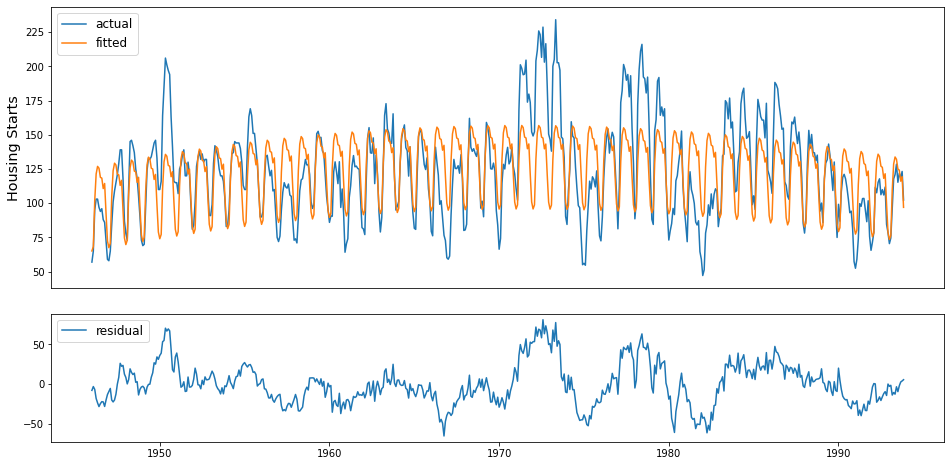

In [48]:
fig = plt.figure(figsize=(16, 8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2])
ax2 = fig.add_subplot(gs[2], sharex=ax1)

ydata = df[Y][:-12]
y_fit = result_trend.fittedvalues # use result for the pure seasonal model; use result_trend for trend+seasonal model
residual=np.squeeze(ydata)-y_fit
ax1.plot(df['Date'][:-12], ydata, label = 'actual')
ax1.plot(df['Date'][:-12], y_fit, label = 'fitted')

ax2.plot(df['Date'][:-12], residual, '-',label='residual')

ax1.set_xticks(['1950-01-01','1960-01-01', '1970-01-01', '1980-01-01', '1990-01-01'])
ax1.set_xticklabels(['1950', '1960', '1970', '1980', '1990'], fontsize='large')
ax1.tick_params(bottom=False, labelbottom=False, left=True, labelleft=True)
ax1.set_ylabel('Housing Starts', fontsize = 'x-large')

ax1.legend(loc='upper left', fontsize = 'large')
ax2.legend(loc='upper left', fontsize = 'large')

[Text(0, 0, '2'),
 Text(0, 0, '4'),
 Text(0, 0, '6'),
 Text(0, 0, '8'),
 Text(0, 0, '10'),
 Text(0, 0, '12')]

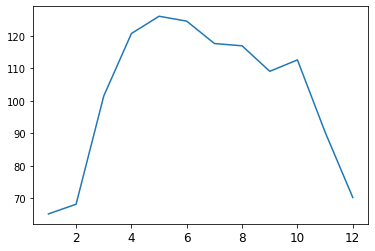

In [49]:
f, ax = plt.subplots(1,1)
ax.plot(season)
ax.set_xticks(['m_2','m_4', 'm_6', 'm_8', 'm_10', 'm_12'])
ax.set_xticklabels(['2', '4', '6', '8', '10', '12'], fontsize='large')

##Forecasting with Seasonality

Text(0, 0.5, 'Housing Starts')

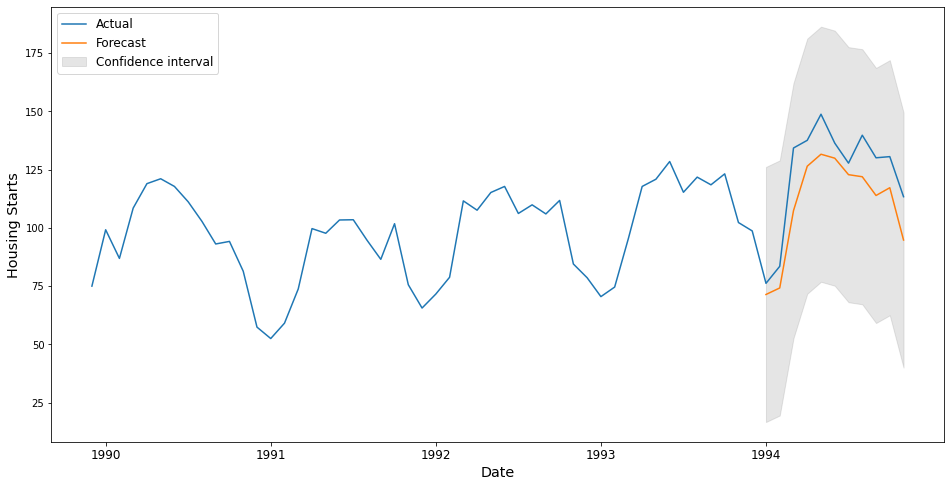

In [50]:
se = np.sqrt(result.mse_resid)

# result_trend.params[0] is the coefficient for "time" variable
# result_trend.params[1] is the coefficient for "time2" variable
forecast = season_trend[:-1].to_numpy() + result_trend.params[0]*df['time'][-11:] + result_trend.params[1]*df['time2'][-11:] # forecast with trend+seasonal model
#forecast = season[:-1]
forecast_CI_l = forecast - 1.96*se
forecast_CI_u = forecast + 1.96*se

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
ax.plot(df['Date'][-60:], df['HSTARTS'][-60:], label = 'Actual')
ax.plot(df['Date'][-11:], forecast, label = 'Forecast')
ax.fill_between(df['Date'][-11:], forecast_CI_l, forecast_CI_u, 
                color= 'gray', alpha = 0.2, zorder = 0, label = 'Confidence interval')
ax.set_xticks(['1990-01-01','1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01'])
ax.set_xticklabels(['1990', '1991', '1992', '1993', '1994'], fontsize='large')

ax.legend(loc='upper left', fontsize='large')

ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Housing Starts', fontsize='x-large')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

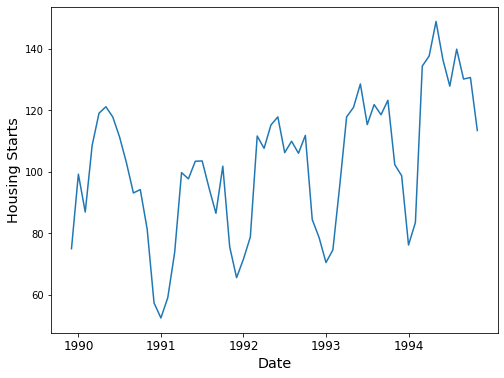

In [ ]:
fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(df['Date'][-60:], df['HSTARTS'][-60:])

ax.set_xticks(['1990-01-01','1991-01-01', '1992-01-01', '1993-01-01', '1994-01-01'])
ax.set_xticklabels(['1990', '1991', '1992', '1993', '1994'], fontsize='large')

ax.set_xlabel('Date', fontsize='x-large')
ax.set_ylabel('Housing Starts', fontsize='x-large')

plt.savefig('HousingStarts_zoom.pdf')
files.download('HousingStarts_zoom.pdf')